<a href="https://colab.research.google.com/github/nayane-d-souza/mineracao_preprocessing_stroke_prediction/blob/main/Mineracao__pre_processamento_stroke_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [ ]:
df = pd.read_csv ('/content/drive/MyDrive/mineração_de_dados/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

#Análise da distribuição dos dados

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'body mass index(BMI)')

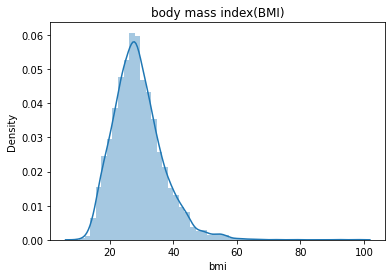

In [ ]:
sns.distplot (df['bmi']).set_title('body mass index(BMI)')
#sns.boxplot(df['bmi']).set_title('body mass index (BMI)')

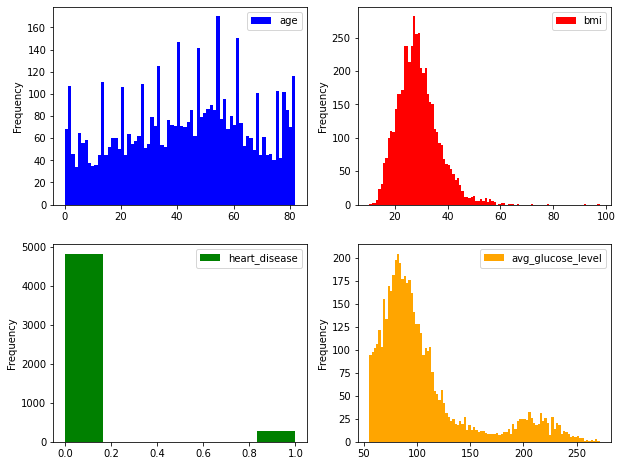

In [ ]:
fig,axes = plt.subplots(nrows=2, ncols=2, figsize = (10,8))
df.plot(kind='hist', y='age', bins=70, color='b', ax=axes[0][0])#axis é a posição do gráfico na figura, para não sobrepor?
df.plot(kind='hist', y='bmi', bins=100, color='r', ax=axes[0][1]) #bins é o número de colunas?
df.plot(kind='hist', y='heart_disease', bins=6, color='g', ax=axes[1][0])
df.plot(kind='hist', y='avg_glucose_level', bins=100, color='orange', ax=axes[1][1])
#plt.show()

#RESUMO GERAL DA BASE DE DADOS

In [ ]:
print('Linhas: ', df.shape[0])
print('Colunas: ', df.shape[1])
print('\nAtributos: \n', df.columns.tolist())
print('\nValores faltantes : ', df.isnull().sum().values.sum())
#se colocar só isnull aparece cada coluna com false e true
#ao cobinas isnull .sum, temos a soma por atributo de valores faltantes
#ao adicionar.values.sum() temos a soma total dos valores faltantes, sem especificar o atributo
print('\nValores únicos: \n', df.nunique())

Linhas:  5110
Colunas:  12

Atributos: 
 ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']

Valores faltantes :  201

Valores únicos: 
 id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64


DATA VISUALIZATION

HEATMAP CORRELATION

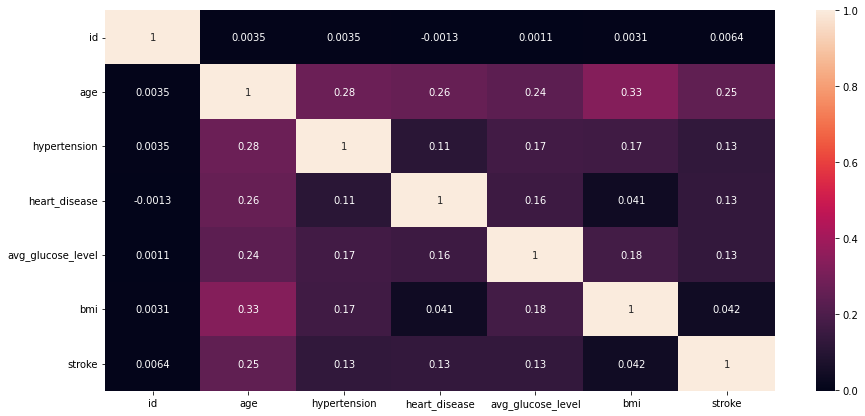

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True)

#Relação Stroke e Atributos Categóricos

Stroke/ ever married

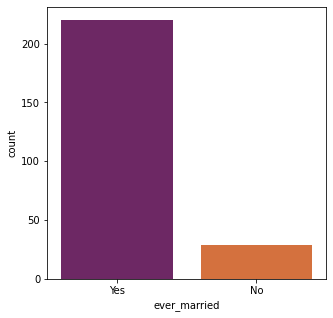

In [ ]:
plt.figure(figsize = (5,5))
strok = df.loc[df['stroke'] == 1]
sns.countplot(data = strok, x = 'ever_married',palette = 'inferno')

Stroke/ Work Type

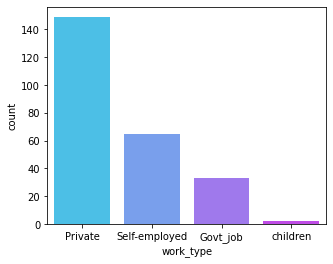

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(data=strok,x='work_type', palette = 'cool')

Stroke/Smoking Status

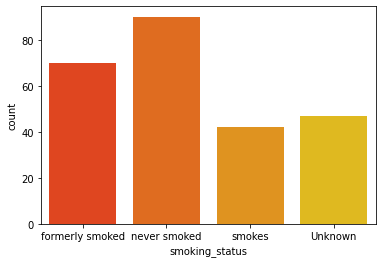

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=strok, x='smoking_status', palette = 'autumn')

Residence Type

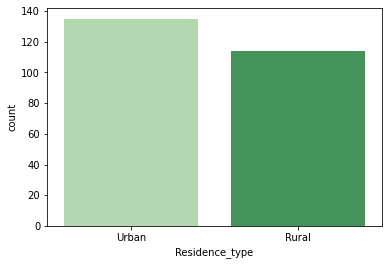

In [ ]:
plt.figure(figsize = (6,4))
sns.countplot(data=strok, x='Residence_type', palette = 'Greens')

Stroke/ Heart Disease

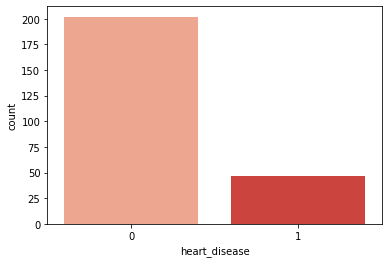

In [ ]:
plt.figure(figsize =  (6,4))
sns.countplot(data=strok, x='heart_disease', palette='Reds')

Stroke/ Hypertension

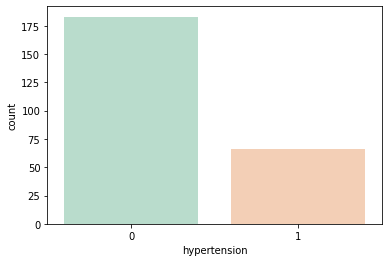

In [ ]:
plt.figure(figsize = (6,4))
sns.countplot(data = strok, x = 'hypertension', palette = "Pastel2")

#Pré-processamento

##Remoção ID feature e verificação de dados faltantes

In [ ]:
df = df.drop(columns = 'id', axis = 1)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df[df.isnull().any(axis=1)] #retorna a tabela com as linhas com dados faltanto

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5039,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [ ]:
###Substituição NAs BMI pela mediana
#mediana = sts.median(df['bmi'])
##preenche NAs
#df['bmi].fillna(mediana,inplace=True)

In [ ]:
#Outra opção com o SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.NaN, strategy = 'median')
df['bmi'] = imputer.fit_transform(df['bmi'].values.reshape(-1,1))[:,0] #??? values reshape? (-1,1)?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


##Encoding Categorical Features

In [ ]:
df['Residence_type'] = df['Residence_type'].apply(lambda x:1 if x=='Urban' else 0)
df['ever_married'] = df['ever_married'].apply(lambda x:1 if x == 'Yes' else 0)
df['gender'] = df['gender'].apply(lambda x:1 if x == 'Male' else 0)

df = pd.get_dummies(data=df, columns=['smoking_status'])
df = pd.get_dummies(data=df, columns=['work_type'])

In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.1,1,0,0,1,0,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,0,1,0,0
3,0,49.0,0,0,1,1,171.23,34.4,1,0,0,0,1,0,0,1,0,0
4,0,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,1,83.75,28.1,0,0,0,1,0,0,0,1,0,0
5106,0,81.0,0,0,1,1,125.20,40.0,0,0,0,1,0,0,0,0,1,0
5107,0,35.0,0,0,1,0,82.99,30.6,0,0,0,1,0,0,0,0,1,0
5108,1,51.0,0,0,1,0,166.29,25.6,0,0,1,0,0,0,0,1,0,0


##Normalização dos dados

In [ ]:
std = StandardScaler()
columns = ['avg_glucose_level','bmi','age']
scaled = std.fit_transform(df[['avg_glucose_level','bmi','age']])
scaled = pd.DataFrame(scaled, columns=columns)
df=df.drop(columns=columns, axis=1)

In [ ]:
df = df.merge(scaled, left_index = True, right_index = True, how = 'left') # what are these parameters?
df

,gender,hypertension,heart_disease,ever_married,Residence_type,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,avg_glucose_level,bmi,age
0,1,0,1,1,1,1,0,1,0,0,0,0,1,0,0,2.706375,1.005086,1.051434
1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,2.121559,-0.098981,0.786070
2,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,-0.005028,0.472536,1.626390
3,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,1.437358,0.719327,0.255342
4,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1.501184,-0.631531,1.582163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,-0.494658,-0.098981,1.626390
5106,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0.420775,1.446713,1.670617
5107,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,-0.511443,0.225745,-0.363842
5108,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1.328257,-0.423706,0.343796


#Algoritmos de Classificação


*   Random  Forest
*   SVM (Support Vector Machine)



##Separação entre treino e teste (70% e 30%)

In [ ]:
X = df.drop(['stroke'], axis = 1).values
y = df['stroke'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

##SVM - Support Vector Machine

In [ ]:
svc = SVC(random_state = 0)
svc.fit(X_train, y_train)
#==
#Score
#==
svc_score = svc.score(X_train, y_train)
svc_test = svc.score(X_test, y_test)
#==
#testing model
#==
y_pred = svc.predict(X_test)
#==
#evaluation
#==
cm = confusion_matrix(y_test,y_pred)
print('Training Score', svc_score)
print('Testing Score\n', svc_test)
print(cm)

Training Score 0.9516354487000279
Testing Score
 0.9504240052185258
[[1457    0]
 [  76    0]]


##Random Forest Classifier

In [ ]:
forest = RandomForestClassifier(n_estimators = 100)
#==
forest.fit(X_train, y_train)
#==
#Score
#==
forest_score = forest.score(X_train, y_train)
forest_test = forest.score (X_test, y_test)
#==
#testing model
#==
y_pred = forest.predict(X_test)
#==
#evaluation
#==
cm = confusion_matrix(y_test, y_pred)
print('Training Score', forest_score)
print('Testing Score\n', forest_test)
print(cm)

Training Score 1.0
Testing Score
 0.9497716894977168
[[1456    1]
 [  76    0]]


###Exemplo com validação cruzada


*   Random Forest




In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
#Create StratifiedKFold object
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)
lst_accu_stratified = []

In [ ]:
for train_index, test_index in skf.split(X,y):
  x_train_fold, x_test_fold = X[train_index], X[test_index]
  y_train_fold, y_test_fold = y[train_index], y[test_index]
  forest.fit(x_train_fold, y_train_fold)
  lst_accu_stratified.append(forest.score(x_test_fold, y_test_fold))

#print de output
print('Lista de ACC: ', lst_accu_stratified)
print('\nMaior ACC: ', max(lst_accu_stratified)*100, '%')
print('\nMenor ACC: ', min(lst_accu_stratified)*100,'%')
print('\nMédia ACC: ', sts.mean(lst_accu_stratified)*100, '%')
print('\nDesvio Padrão: ', sts.stdev(lst_accu_stratified))

Lista de ACC:  [0.949119373776908, 0.949119373776908, 0.949119373776908, 0.949119373776908, 0.949119373776908, 0.9510763209393346, 0.949119373776908, 0.9510763209393346, 0.9452054794520548, 0.9530332681017613]

Maior ACC:  95.30332681017613 %

Menor ACC:  94.52054794520548 %

Média ACC:  94.95107632093934 %

Desvio Padrão:  0.0020211263385296273


###Exemplo de balanceamento das classes


*   Abordagem SMOTE e Random Forest

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
#Create StratifiedKFold object
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)
lst_accu_stratified = []

for train_index, test_index in skf.split(X,y):
  x_train_fold, x_test_fold = X[train_index], X[test_index]
  y_train_fold, y_test_fold = y[train_index], y[test_index]
  sm = SMOTE()
  x_train_oversampled, y_train_oversampled = sm.fit_resample(x_train_fold, y_train_fold)
  forest.fit(x_train_oversampled, y_train_oversampled)
  lst_accu_stratified.append(forest.score(x_test_fold, y_test_fold))

#Print the output:
print('Lista de ACC: ', lst_accu_stratified)
print('\nMaiorACC: ', max(lst_accu_stratified)*100, '%')
print('\nMenor ACC: ', min(lst_accu_stratified)*100, '%')
print('\nMédia ACC: ', sts.mean(lst_accu_stratified)*100,'%')
print('\nDesvio Padrão: ', sts.stdev(lst_accu_stratified))                   

Lista de ACC:  [0.9197651663405088, 0.9217221135029354, 0.9197651663405088, 0.9099804305283757, 0.9119373776908023, 0.9354207436399217, 0.923679060665362, 0.9354207436399217, 0.9217221135029354, 0.9158512720156555]

MaiorACC:  93.54207436399217 %

Menor ACC:  90.99804305283757 %

Média ACC:  92.15264187866927 %

Desvio Padrão:  0.008527640362614995
